 ## CIFAR-10 Image Classification with Convolutional Neural Networks

📌 Project Overview

In this project, we build a Convolutional Neural Network (CNN) using TensorFlow and Keras to classify images from the `CIFAR-10` dataset. The goal is to correctly identify the class of each image, which can belong to one of 10 categories: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, or truck.

This project is designed to practice and showcase fundamental skills in image processing, deep learning, and performance evaluation using CNNs.

In [70]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Input
import matplotlib.pyplot as plt
import numpy as np

### Dataset Description

The `CIFAR-10` dataset is a widely used benchmark dataset for image classification. It contains:

* 60,000 color images (32x32 pixels)

    * 50,000 training images
    * 10,000 test images

* 10 classes, each containing 6,000 images

The dataset is already pre-split into training and test sets, and each image is labeled with one of the 10 classes.

### Data Preprocessing
- All image pixel values were normalized to the [0, 1] range.

- For visualization, we displayed one image from each class to better understand the data.


In [71]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

In [54]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [72]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [56]:
X_train[0].shape

(32, 32, 3)

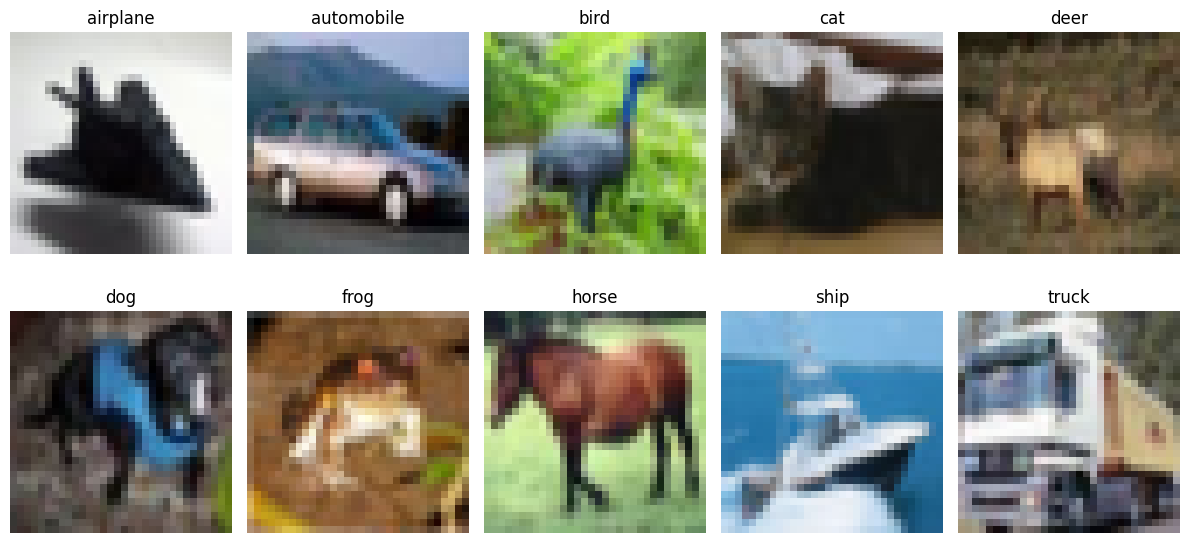

In [74]:
plt.figure(figsize=(12,6))
for i in range(10):
  idx = np.where(y_train == i)[0][0]
  plt.subplot(2, 5, i+1)
  plt.imshow(X_train[idx])
  plt.title(class_names[y_train[idx][0]])
  plt.axis("off")
plt.tight_layout()
plt.show()

### Model Architecture Explanation

The model is structured in two main parts:

1. **Feature Extraction**

    The first part of the model consists of convolutional and pooling layers, whose role is to extract meaningful features from the input images. Instead of feeding raw pixels directly into a classifier, the model first transforms the images into a more informative internal representation — making it easier for the classifier to distinguish between classes.

    We define the input shape as (32, 32, 3) since CIFAR-10 images are RGB (3 channels: red, green, blue), and each image is 32x32 pixels in size.


In [75]:
model = models.Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [76]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

2. **Classification Head**

    The second part of the model is a fully connected (dense) classifier. This part receives the output from the convolutional feature extractor and makes a final prediction about the class of the image.

    Since the output of the last convolutional layer is a 3D tensor (e.g., (4, 4, 64)), we first flatten it into a 1D vector of size 4×4×64 = 1024. This vector is then passed through one or more dense layers. The final output layer has 10 neurons (one per CIFAR-10 class) with a softmax activation to represent class probabilities.

In [77]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [78]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

### Model Compilation & Training - Parameters

Optimizer: `adam` - adaptive and efficient for most tasks.

Loss funtions: `sparse_categorical_crossentropy` - used for multi-class classification with integer labels.

Metric: `accuracy` - simple and intuitive for classification.

Epochs: `10` - enough for initial learning without overfitting.

Batch size: `64` - good trade-off between speed and stability.

Validation data: `(x_test, y_test)`  monitors generalization during training.

In [79]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [80]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    batch_size=64
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 87ms/step - accuracy: 0.2519 - loss: 1.9959 - val_accuracy: 0.5032 - val_loss: 1.3910
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 83ms/step - accuracy: 0.4642 - loss: 1.4782 - val_accuracy: 0.5658 - val_loss: 1.2312
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.5282 - loss: 1.3271 - val_accuracy: 0.5843 - val_loss: 1.1672
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.5724 - loss: 1.2148 - val_accuracy: 0.6099 - val_loss: 1.0873
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 83ms/step - accuracy: 0.5956 - loss: 1.1441 - val_accuracy: 0.6468 - val_loss: 0.9989
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 87ms/step - accuracy: 0.6217 - loss: 1.0794 - val_accuracy: 0.6580 - val_loss: 0.9564
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.6392 - loss: 1.0312 - val_accuracy: 0.6836 - val_loss: 0.9230
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 91ms/step - accuracy: 0.6564 - loss: 0.9761 - 

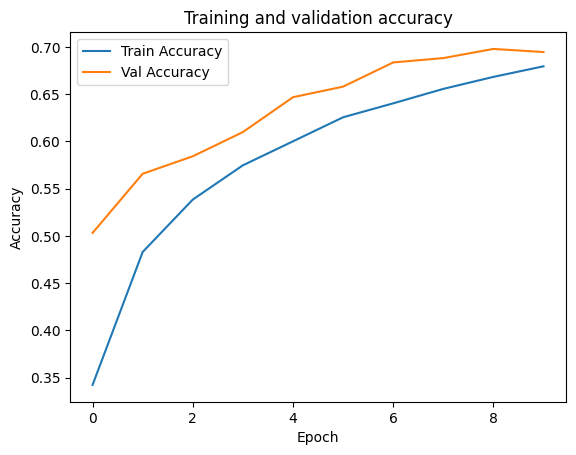

313/313 - 4s - 12ms/step - accuracy: 0.6946 - loss: 0.8666
0.694599986076355


In [81]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and validation accuracy')
plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(test_acc)

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


### Model Evaluation

After training the model, we evaluate its performance using a classification report and a confusion matrix.

🔹 Classification Report provides precision, recall, and F1-score for each class.

  - **Precision**: How many predicted instances of a class were actually correct.

  - **Recall**: How many actual instances of a class were correctly predicted.

  - **F1-score**: Harmonic mean of precision and recall, useful when dealing with class imbalance.

Ideally, we want all scores to be close to 1.0, especially for classes that are more difficult to distinguish (e.g., cat vs. dog).

🔹 Confusion Matrix shows how often the model confuses one class with another.
  
  - The diagonal elements represent correct predictions.

  - Off-diagonal values indicate misclassifications — for example, if the model often mistakes cats for dogs, it will show up here.

A perfect model would have a strong diagonal with low off-diagonal values.

By analyzing the matrix, we can identify which classes are most often confused and possibly improve the model accordingly (e.g., with augmentation or class weighting).

In [84]:
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.74      0.76      0.75      1000
  automobile       0.77      0.88      0.82      1000
        bird       0.66      0.43      0.52      1000
         cat       0.55      0.41      0.47      1000
        deer       0.57      0.72      0.63      1000
         dog       0.63      0.54      0.58      1000
        frog       0.71      0.81      0.76      1000
       horse       0.67      0.81      0.73      1000
        ship       0.82      0.82      0.82      1000
       truck       0.80      0.77      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



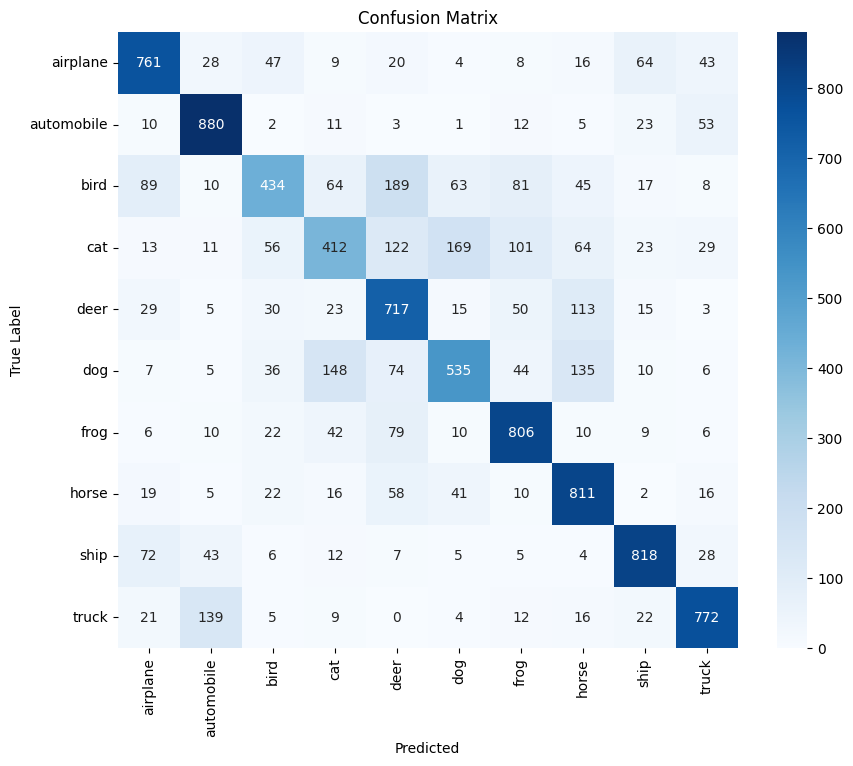

In [85]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

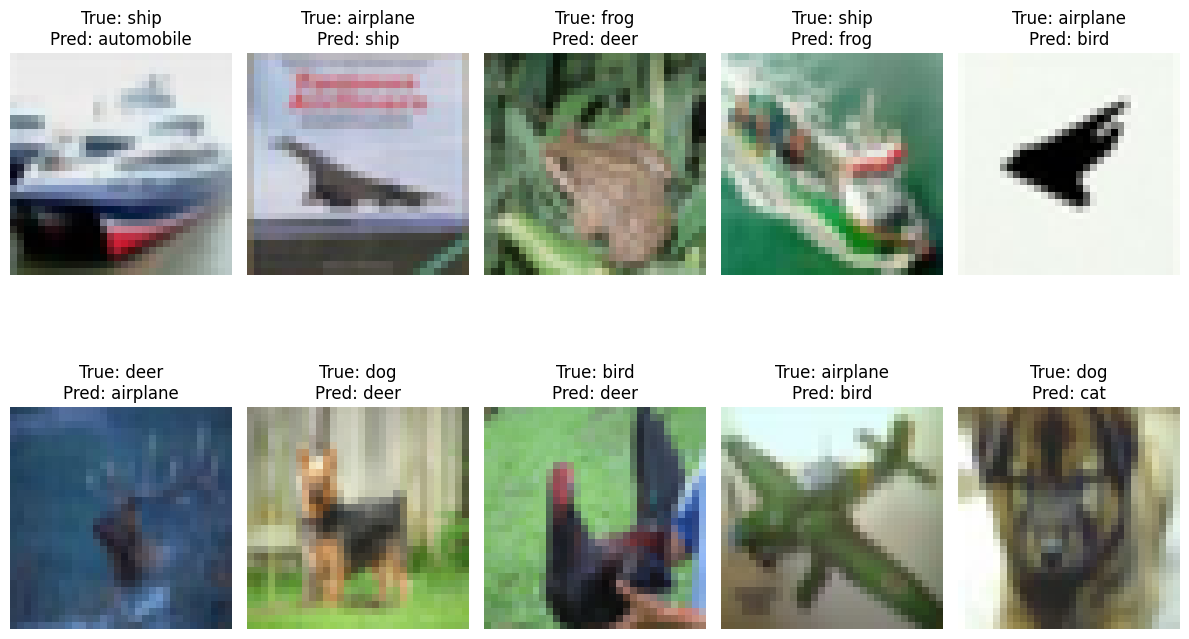

In [86]:
wrong_idxs = np.where(y_pred != y_true)[0]

plt.figure(figsize=(12, 8))
for i, idx in enumerate(wrong_idxs[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Results

- The model achieved a strong performance on the CIFAR-10 test set, almost 70% accuracy.

- Certain classes (e.g., automobile, airplane) were classified more accurately than others (e.g., cat, dog), likely due to visual similarity between some categories.

- Visual inspection of incorrect predictions revealed cases of ambiguous or low-quality images.